In [0]:
!pip install googletrans
!pip install tqdm --upgrade
!pip install twython

Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.45.0)


In [0]:
# web scraping
import requests
from bs4 import BeautifulSoup
from time import time, sleep
from random import randint

# Translation
from googletrans import Translator

# Utilities
from tqdm import tqdm
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

# NLP
from nltk import sent_tokenize, word_tokenize, pos_tag, RegexpParser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation

In [0]:
# Download resources
import nltk

nltk.download("punkt")
nltk.download("vader_lexicon")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Web Scrap

โรงพยาบาลพระราม9

In [0]:
def honestdoc_comment(url, hospitalName):
    """
    This function is to scrap data from a webboard (https://www.honestdocs.com).

    INPUT
    url : String
      URL of the target website
    
    OUTPUT
    comment : List
      List of comments
    score : List
      List of rating score
    """
    #create connection
    data = requests.get(url)
    print("requests code : {}".format(data.status_code)) 
    print("note\n2xx: success\n4xx, 5xx: error")
    
    #scrape comment and score
    start_time = time() #start scraping data from page1
    r = requests.get(url, params=dict(query="web scraping",page=1)) 
    soup = BeautifulSoup(r.text,"html.parser")
    n = len(soup.find_all("div",{"class":"comments__content"})) #find n of items in the page
    
    #extract each item
    comment = [soup.find_all("div",
                             {"class":"comments__content"})[i].get_text().strip() for i in range(0,n)]
    score = [soup.find_all("span",
                           {"class":"stars star-rating"})[i].attrs["data-score"] for i in range(0,n)]
    elapsed_time = time() - start_time #finish scraping data from page1
    print("Time used for scraping data from page - 1 : {} s".format(elapsed_time))
    sleep(randint(1,3)) #mimic human behavior
           
    p = 2 #start scraping data from page2
    while n > 0: #until the number of items in a page = 0
        start_time = time() 
        r = requests.get(url, params=dict(query="web scraping",page=p))
        soup = BeautifulSoup(r.text,"html.parser")
        n = len(soup.find_all("div",{"class":"comments__content"}))
        [comment.append(soup.find_all("div",
                                      {"class":"comments__content"})[i].get_text().strip()) for i in range(0,n)]
        [score.append(soup.find_all("span",
                                    {"class":"stars star-rating"})[i].attrs["data-score"]) for i in range(0,n)]
        elapsed_time = time() - start_time
        print("Time used for scraping data from page - {} : {} s".format(p, elapsed_time))
        p +=1
        sleep(randint(1,3))

    df = pd.DataFrame({"comment": comment, 
              "score": score
              })
    
    df["hospital"] = hospitalName
    
    return df

คำสั่งแปลงจากภาษาไทยเป็นภาษาอังกฤษ

In [0]:
def th2en(comment):
  try:
    textTrans = Translator().translate(comment, src="th", dest="en").text
  except:
    textTrans = ""
    print("\n Can not translate " + comment)

  return textTrans

ดึงข้อมูลความเห็นจากโรงพยาบาลพระราม9

In [0]:
df = honestdoc_comment(r"https://www.honestdocs.co/hospitals/praram-9-hospital", "praram-9-hospital")
comments = df

requests code : 200
note
2xx: success
4xx, 5xx: error
Time used for scraping data from page - 1 : 0.38301587104797363 s
Time used for scraping data from page - 2 : 0.44156956672668457 s
Time used for scraping data from page - 3 : 0.36740589141845703 s
Time used for scraping data from page - 4 : 0.5951676368713379 s
Time used for scraping data from page - 5 : 0.44831132888793945 s
Time used for scraping data from page - 6 : 0.36893510818481445 s
Time used for scraping data from page - 7 : 0.5613265037536621 s
Time used for scraping data from page - 8 : 0.36699581146240234 s
Time used for scraping data from page - 9 : 0.38283324241638184 s
Time used for scraping data from page - 10 : 0.3901021480560303 s
Time used for scraping data from page - 11 : 0.5157008171081543 s
Time used for scraping data from page - 12 : 0.4547297954559326 s
Time used for scraping data from page - 13 : 0.4767262935638428 s
Time used for scraping data from page - 14 : 0.3806173801422119 s
Time used for scraping d

นำคอมเม้นท์มาแปลงเป็นภาษาอังกฤษ

In [0]:
tqdm.pandas()
comments["en"] = comments.progress_apply(lambda x: th2en(x["comment"]), axis=1)

comments = df

100%|██████████| 98/98 [00:10<00:00,  9.62it/s]


ได้ทั้งหมด 98 แถว 4 column

In [0]:
comments.shape

(98, 4)

นับจำนวนคอมเม้นท์ได้ทั้งหมด 98 คอมเม้น

In [0]:
comments["hospital"].value_counts()

praram-9-hospital    98
Name: hospital, dtype: int64

ตรวจสอบ 5 แถวแรกของข้อมูล

In [0]:
comments.head(10)

,comment,score,hospital,en
0,ได้รับการเปลี่ยนข้อเข่าจากคุณหมอณัฐวุฒิข้างเดี...,5,praram-9-hospital,Get a knee replacement by the doctor Nattawut ...
1,บริการดีมาก พยาบาลพูดจาดี ดูแลดี ให้ความช่วยเห...,5,praram-9-hospital,"Very good service, good nursing care flatterin..."
2,จริงก็ไปพระราม9ตลอด เพราะสะดวก สะอาดรวดรวดเร็ว...,2,praram-9-hospital,"Truth to Rama 9, as well as fast, convenient, ..."
3,ระบบการให้การรักษามีมาตรฐานสูง พนักงานใส่ใจดี,5,praram-9-hospital,System to maintain a high standard. Good atten...
4,คุณหมอน่ารัก แนะนำ ให้คำปรึกษาดี เจ้าหน้าที่ย...,5,praram-9-hospital,Doctor's Advice Consulting nice. staff smiling...
5,ได้ตรวจสุขภาพประจำปีที่นี่ทุกๆปี เป็นรพ. เอกชน...,5,praram-9-hospital,Have annual check here every year as a hospita...
6,การให้บริการค่อนข้างรวดเร็ว เจ้าหน้าที่ใจดีมาก...,4,praram-9-hospital,"The service is quite fast Friendly staff, very..."
7,บริการดี แพทย์มีความเชี่ยวชาญและเอาใจใส่ สถานท...,4,praram-9-hospital,"Good service, medical expert and caring place,..."
8,สถานที่สะอาด รอคิวไม่นานมากนัก,4,praram-9-hospital,"Clean place, not very long queues."
9,รู้สึกประทับใจในการบริการของทางโรงพยาบาล ไม่ต้...,4,praram-9-hospital,Impressed by the services of the hospital. No ...


Mount Drive เพื่อAuthorize เข้าถึง Folder ในDrive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/My Drive/DS532_Text_Analytic/Project_Hospital')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Save ข้อมูลเป็น csv

In [0]:
#backup data 
comments.to_csv("comment_praram-9-hospital.csv", index=False)

In [0]:
from tqdm import tqdm_notebook

**Read data**

In [0]:
rama = pd.read_csv("comment_praram-9-hospital.csv")
rama = rama.reset_index()
rama = rama.rename(columns={"index": "cid"})

Sentence Tokenize

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk import sent_tokenize

sentences = []
cids = []
for cid in rama["cid"]:
    s = sent_tokenize(rama.loc[cid, "en"])
    sentences = sentences + s
    cids = cids + [cid] * len(s)

**Sentence-level sentiment**

In [0]:
!pip install twython

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
def predict_sentiment(sentence):
  sa = SentimentIntensityAnalyzer()
  sentiment_distribution = sa.polarity_scores(sentence)
  score = sentiment_distribution.get("compound")
  
  if score >= 0.05:
    return "positive"
  elif score <= -0.05:
    return "negative"
  else:
    return "neutral"

In [0]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
sentiments = []
for sentence in tqdm_notebook(sentences, total=len(sentences)):
    sentiments.append(predict_sentiment(sentence))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Parsing

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
from nltk import word_tokenize, pos_tag, RegexpParser

In [0]:
grammar = """NP: {<NN|NNS>+}
                 {<NN|NNS>+<CC><NN|NNS>+}"""
chunker = RegexpParser(grammar)
parse_trees = []
for sentence in sentences:
    parse_trees.append(chunker.parse(pos_tag(word_tokenize(sentence))))

In [0]:
parse_trees

[Tree('S', [('Get', 'VB'), ('a', 'DT'), Tree('NP', [('knee', 'NN'), ('replacement', 'NN')]), ('by', 'IN'), ('the', 'DT'), Tree('NP', [('doctor', 'NN')]), ('Nattawut', 'NNP'), Tree('NP', [('side', 'NN')]), ('.', '.')]),
 Tree('S', [('You', 'PRP'), ('made', 'VBD'), ('very', 'RB'), ('good', 'JJ'), ('But', 'CC'), ('I', 'PRP'), ('have', 'VBP'), Tree('NP', [('trouble', 'NN')]), ('traveling', 'VBG'), ('abroad', 'RB'), ('often', 'RB'), ('do', 'VBP'), ('not', 'RB'), ('realize', 'VB'), ('that', 'IN'), ('the', 'DT'), Tree('NP', [('hospital', 'NN')]), ('when', 'WRB'), ('the', 'DT'), Tree('NP', [('surgery', 'NN')]), (',', ','), ('organ', 'JJ'), Tree('NP', [('customers', 'NNS')]), ('already', 'RB'), ('have', 'VBP'), ('a', 'DT'), Tree('NP', [('card', 'NN')]), ('about', 'IN'), ('the', 'DT'), Tree('NP', [('surgery', 'NN')]), ('that', 'IN'), Tree('NP', [('customers', 'NNS')]), ('carry', 'VBP'), ('a', 'DT'), Tree('NP', [('card', 'NN')]), ('or', 'CC'), Tree('NP', [('cards', 'NNS')]), ('Blood', 'NNP'), ('G

Extract Noun Phrase

In [0]:
def extract_np(parsed_tree):
    nps = []
    for subtree in parsed_tree.subtrees():
        if subtree.label() == 'NP':
            t = subtree
            t = " ".join(word for word, tag in t.leaves())
            nps.append(t)
    return nps

In [0]:
nps = []
for parse_tree in parse_trees:
    nps.append(extract_np(parse_tree))

In [0]:
nps

[['knee replacement', 'doctor', 'side'],
 ['trouble',
  'hospital',
  'surgery',
  'customers',
  'card',
  'surgery',
  'customers',
  'card',
  'cards'],
 ['time'],
 ['consideration'],
 ['service', 'nursing care', 'support'],
 ['key', 'doctor', 'cost', 'bathroom'],
 ['drug', 'quality'],
 ['stomach', 'pain', 'track', 'appointment', 'drug'],
 ['Truth', 'fast', 'convenient'],
 ['doctors', 'bloating', 'lifting'],
 ['level'],
 ['baby'],
 ['System', 'standard'],
 ['staff'],
 ['nice'],
 ['staff', 'angel'],
 ['check', 'year', 'hospital', 'interests', 'patients', 'hospital'],
 ['relations', 'inter', 'languages', 'doctor', 'people'],
 [],
 ['one'],
 ['service', 'staff', 'treatment'],
 ['service', 'expert', 'place', 'clean', 'services'],
 ['place', 'queues'],
 ['services', 'hospital'],
 ['time', 'time'],
 ['hospital food'],
 ['cheek swollen',
  'hand',
  'pain',
  'records',
  'doctor',
  'surgery',
  'doctors',
  'painkillers',
  'antibiotics',
  'home',
  'pain'],
 ['cheek',
  'doctor',
  'ne

**Put information into DataFrame**

In [0]:
df = pd.DataFrame({"cids": cids, 
                   "sentences": sentences, 
                   "sentiments": sentiments, 
                   "NP": nps})

In [0]:
df.head(10)

,cids,sentences,sentiments,NP
0,0,Get a knee replacement by the doctor Nattawut ...,neutral,"[knee replacement, doctor, side]"
1,0,You made very good But I have trouble travelin...,positive,"[trouble, hospital, surgery, customers, card, ..."
2,0,foreign it would not have to ask for the time ...,neutral,[time]
3,0,Take into consideration interfering with it.,neutral,[consideration]
4,1,"Very good service, good nursing care flatterin...",positive,"[service, nursing care, support]"
5,1,The key is not to wait And the doctor advised ...,positive,"[key, doctor, cost, bathroom]"
6,1,I've been sick suddenly Was treated immediatel...,negative,"[drug, quality]"
7,1,I always treat stomach Severe abdominal pain Y...,positive,"[stomach, pain, track, appointment, drug]"
8,2,"Truth to Rama 9, as well as fast, convenient, ...",positive,"[Truth, fast, convenient]"
9,2,"But the doctors told us last bloating, heavy l...",neutral,"[doctors, bloating, lifting]"


In [0]:
df['sentences'] = df['sentences'].str.replace("[^a-zA-Z#]", " ")

In [0]:
df['sentiments'] = df['sentiments'].str.replace("[^a-zA-Z#]", " ")

Split dataframe into positive and negative sentiment

In [0]:
pos = df[df["sentiments"] == "positive"].reset_index(drop=True)
pos_words = sum(pos["NP"].tolist(), [])
pos_words = [word.lower() for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

In [0]:
neg = df[df["sentiments"] == "negative"].reset_index(drop=True)
neg_words = sum(neg["NP"].tolist(), [])
neg_words = [word.lower() for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

**Word Cloud Representation**

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
def vizwordcloud(df):
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

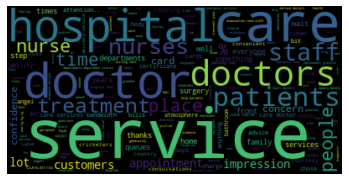

In [0]:
vizwordcloud(poshist)

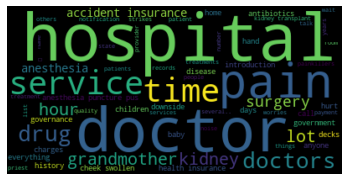

In [0]:
vizwordcloud(neghist)

We saw 2 problems: 1) Singular and plural words were not combined and 2) words that should not be appeared in the wordcloud such as patients because of the co-reference resolution problem.

Let's transfrom selected words to their singular form because at this stage the number of words is not much already then add categories to filter out.

In [0]:
def plural2singular(word):
  if word == "doctors":
    return "doctor"
  elif word == "nurses":
    return "nurse"
  elif word == "clinics":
    return "clinic"
  elif word == "hospitals":
    return "hospital"
  elif word == "services":
    return "service"
  elif word == "staffs":
    return "staff"
  elif word == "treatments":
    return "treatment"
  elif word == "students":
    return "student"
  else:
    return word

In [0]:
pos_words = [plural2singular(word) for word in pos_words]
poshist = pd.DataFrame({"words": pos_words})
poshist = poshist.groupby("words").size().reset_index(name="#pos")

neg_words = [plural2singular(word) for word in neg_words]
neghist = pd.DataFrame({"words": neg_words})
neghist = neghist.groupby("words").size().reset_index(name="#neg")

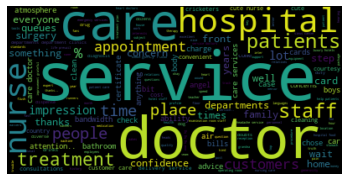

In [0]:
vizwordcloud(poshist)

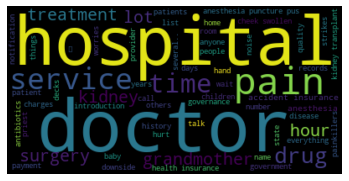

In [0]:
vizwordcloud(neghist)

In [0]:
def groups(word):
    if word in ("doctor", "nurse", "student"):
        return "staff"
    elif word in ("hospital", "clinic", "equipment", "place"):
        return "infrastructure"
    elif word in ("service", "care", "treatment", "surgery", "disease", "medical care"):
        return "service"
    elif word in ("queue", "appointment"):
        return "process"
    elif word in ("price", "claim"):
        return "finance"
    else:
        return "others"

In [0]:
poshist["category"] = poshist["words"].apply(lambda x: groups(x))
poscount = poshist.groupby("category").size().reset_index(name="#")
poscount = poscount[poscount["category"] != "others"].reset_index(drop=True)

In [0]:
neghist["category"] = neghist["words"].apply(lambda x: groups(x))
negcount = neghist.groupby("category").size().reset_index(name="#")
negcount = negcount[negcount["category"] != "others"].reset_index(drop=True)

**Plot Radar Chart**

In [0]:
poscount

,category,#
0,infrastructure,3
1,process,1
2,service,4
3,staff,2


In [0]:
negcount

,category,#
0,infrastructure,1
1,service,4
2,staff,1


In [0]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot

In [0]:
fig = px.line_polar(poscount, r="#", theta="category", line_close=True)
plot(fig)

'temp-plot.html'

In [0]:
fig_2 = px.line_polar(negcount, r="#", theta="category", line_close=True)
plot(fig_2)

'temp-plot.html'

Extracting Features from cleaned comments

In [0]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['sentences'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
219,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Term Frequency-Inverse Document Frequency (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(df['sentences'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.321338,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.580885,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.640070,0.0,0.0,0.0,0.0,0.605412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.473061,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.386466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.317713,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.380417,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Splitting our dataset into Training and Validation Set

In [0]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [0]:
#Using features from TF-IDF for training set
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.32133801, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.64006987, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [0]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder ()
df['sentiments'] = number.fit_transform(df['sentiments'].astype('str'))
df

,cids,sentences,sentiments,NP
0,0,Get a knee replacement by the doctor Nattawut ...,1,"[knee replacement, doctor, side]"
1,0,You made very good But I have trouble travelin...,2,"[trouble, hospital, surgery, customers, card, ..."
2,0,foreign it would not have to ask for the time ...,1,[time]
3,0,Take into consideration interfering with it,1,[consideration]
4,1,Very good service good nursing care flatterin...,2,"[service, nursing care, support]"
...,...,...,...,...
218,97,Then the doctor would also describe the condit...,1,"[doctor, condition, heart grandmother]"
219,97,Although the surgery was not successful,0,[surgery]
220,97,I guess you have to move back,1,[]
221,97,Although the kidney unusable,1,[kidney]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



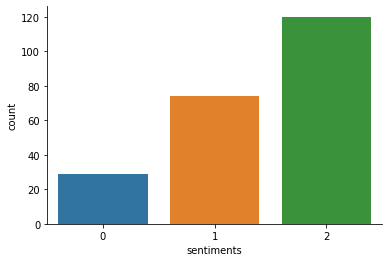

In [0]:
# Neutral label : 0 , Negative label : 1 , Positive  label : 2
import seaborn as sns
sns.countplot(df['sentiments'])
sns.despine()

In [0]:
#Splitting the data into training and validation set
from sklearn.model_selection import train_test_split

In [0]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,df['sentiments'],test_size=0.3,random_state=0)

In [0]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,df['sentiments'],test_size=0.3,random_state=0)

In [0]:
x_train_bow.shape

(156, 153)

In [0]:
x_valid_bow.shape

(67, 153)

In [0]:
y_train_bow.shape

(156,)

In [0]:
y_valid_bow.shape

(67,)

#Applying Machine Learning Models

In [0]:
from sklearn.metrics import f1_score

In [0]:
#Neural Network
from sklearn.neural_network import MLPClassifier
class_NN = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu',solver='adam', max_iter=500)

In [0]:
class_NN.fit(x_train_bow,y_train_bow)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
prediction_bow = class_NN.predict_proba(x_valid_bow)

prediction_bow

array([[9.99860999e-01, 3.63912844e-07, 1.38636834e-04],
       [4.04431939e-02, 7.06767033e-01, 2.52789773e-01],
       [1.50526854e-03, 6.33477987e-03, 9.92159952e-01],
       [4.37377236e-02, 8.32953980e-01, 1.23308296e-01],
       [1.50526854e-03, 6.33477987e-03, 9.92159952e-01],
       [1.45701725e-02, 9.94829132e-02, 8.85946914e-01],
       [1.97717788e-02, 8.03186218e-01, 1.77042003e-01],
       [8.23555083e-04, 4.70405926e-04, 9.98706039e-01],
       [5.66251836e-02, 2.93343176e-01, 6.50031640e-01],
       [1.25596655e-01, 8.47642761e-01, 2.67605837e-02],
       [9.24079588e-01, 7.38118055e-02, 2.10860651e-03],
       [3.96244984e-02, 8.36522811e-01, 1.23852691e-01],
       [1.66305698e-02, 7.04232063e-01, 2.79137368e-01],
       [1.14552497e-02, 9.43258455e-02, 8.94218905e-01],
       [9.16544240e-01, 2.69469478e-02, 5.65088124e-02],
       [1.28614134e-02, 9.42933956e-02, 8.92845191e-01],
       [5.86001816e-01, 1.36600528e-01, 2.77397656e-01],
       [2.76087124e-03, 1.31129

In [0]:
#Calculating the F1 score
# if prediction is equal to 2 else 1 where 2 is for positive comments and 1 for negative sentiment comments
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int,average='micro')

log_bow

0.19402985074626866

In [0]:
class_NN.fit(x_train_tfidf,y_train_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
prediction_tfidf = class_NN.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[3.42029211e-01, 5.47938012e-02, 6.03176988e-01],
       [8.69442027e-03, 5.72851697e-01, 4.18453883e-01],
       [2.53545484e-04, 1.23871680e-03, 9.98507738e-01],
       [3.25578120e-02, 1.32667586e-01, 8.34774602e-01],
       [2.53545484e-04, 1.23871680e-03, 9.98507738e-01],
       [2.66358808e-03, 2.32521555e-02, 9.74084256e-01],
       [3.07917583e-02, 3.48871195e-01, 6.20337047e-01],
       [4.79263623e-04, 5.71637568e-04, 9.98949099e-01],
       [8.33286227e-02, 3.21035440e-01, 5.95635937e-01],
       [1.52394328e-01, 5.26125105e-01, 3.21480567e-01],
       [6.38526145e-01, 1.06637629e-01, 2.54836225e-01],
       [2.39353046e-03, 9.75707379e-01, 2.18990901e-02],
       [1.43398305e-03, 1.71442872e-01, 8.27123145e-01],
       [2.65569174e-02, 2.49565219e-01, 7.23877864e-01],
       [5.54791654e-01, 1.78389982e-01, 2.66818364e-01],
       [8.28000318e-02, 7.95984876e-02, 8.37601481e-01],
       [4.67300215e-01, 5.29891373e-02, 4.79710648e-01],
       [1.08548298e-02, 6.56575

In [0]:
prediction_int_tfidf = prediction_tfidf[:,1]>=0.3

prediction_int_tfidf = prediction_int.astype(np.int)
prediction_int_tfidf

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int_tfidf,average='micro')

log_tfidf

0.19402985074626866

In [0]:
#XGBoost
from xgboost import XGBClassifier
model_bow = XGBClassifier(random_state=0,learning_rate=0.9)
model_bow.fit(x_train_bow, y_train_bow)
xgb = model_bow.predict_proba(x_valid_bow)

xgb

array([[1.9094330e-01, 4.4402438e-01, 3.6503232e-01],
       [3.6086429e-02, 1.8463071e-01, 7.7928293e-01],
       [3.4438919e-03, 2.7377363e-03, 9.9381834e-01],
       [9.5314667e-02, 5.9804404e-01, 3.0664134e-01],
       [3.4438919e-03, 2.7377363e-03, 9.9381834e-01],
       [9.5314667e-02, 5.9804404e-01, 3.0664134e-01],
       [6.3415016e-03, 9.3055058e-01, 6.3107908e-02],
       [3.5303723e-02, 8.0371690e-01, 1.6097941e-01],
       [1.9094330e-01, 4.4402438e-01, 3.6503232e-01],
       [6.9535539e-02, 7.0675838e-01, 2.2370608e-01],
       [9.1673416e-01, 5.5043012e-02, 2.8222779e-02],
       [9.5314667e-02, 5.9804404e-01, 3.0664134e-01],
       [3.5303723e-02, 8.0371690e-01, 1.6097941e-01],
       [1.4849847e-02, 3.6075115e-02, 9.4907510e-01],
       [7.3547788e-02, 1.8532330e-01, 7.4112892e-01],
       [4.2399347e-01, 2.5346650e-02, 5.5065984e-01],
       [1.7045744e-01, 5.2046888e-03, 8.2433784e-01],
       [4.2399347e-01, 2.5346650e-02, 5.5065984e-01],
       [9.5314667e-02, 5.980

In [0]:
xgb = xgb[:,1] >= 0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int,average='micro')

xgb_bow

0.23880597014925373

In [0]:
model_tfidf = XGBClassifier(random_state=2,learning_rate=0.7)
model_tfidf.fit(x_train_tfidf, y_train_tfidf)
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[8.90657544e-01, 3.18330489e-02, 7.75093958e-02],
       [5.29986471e-02, 3.39062661e-01, 6.07938707e-01],
       [9.36047873e-04, 3.05264164e-03, 9.96011257e-01],
       [9.35530737e-02, 5.98512471e-01, 3.07934433e-01],
       [9.36047873e-04, 3.05264164e-03, 9.96011257e-01],
       [9.35530737e-02, 5.98512471e-01, 3.07934433e-01],
       [3.93587463e-02, 6.61704659e-01, 2.98936635e-01],
       [1.75822511e-01, 5.81257641e-01, 2.42919832e-01],
       [4.06038500e-02, 2.98853934e-01, 6.60542190e-01],
       [7.63709322e-02, 6.72250450e-01, 2.51378596e-01],
       [9.28683519e-01, 4.70891036e-02, 2.42273249e-02],
       [9.35530737e-02, 5.98512471e-01, 3.07934433e-01],
       [4.33153063e-02, 9.06542659e-01, 5.01420423e-02],
       [1.26932384e-02, 3.84757146e-02, 9.48831081e-01],
       [8.03744420e-02, 1.89459875e-01, 7.30165660e-01],
       [3.30040067e-01, 1.03377886e-01, 5.66582084e-01],
       [1.61103979e-01, 9.27521382e-04, 8.37968528e-01],
       [1.48915946e-01, 1.31326

In [0]:
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf,average='micro')

score

0.23880597014925373

In [0]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=0)
dct.fit(x_train_bow,y_train_bow)
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[0.        , 0.33333333, 0.66666667],
       [0.04545455, 0.72727273, 0.22727273],
       [0.        , 0.        , 1.        ],
       [0.04545455, 0.72727273, 0.22727273],
       [0.        , 0.        , 1.        ],
       [0.04545455, 0.72727273, 0.22727273],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.04545455, 0.72727273, 0.22727273],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.04545455, 0.72727273, 0.22727273],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.

In [0]:
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow,average='micro')

dct_score_bow

0.2537313432835821

In [0]:
dct.fit(x_train_tfidf,y_train_tfidf)
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.04545455, 0.72727273, 0.22727273],
       [0.        , 0.        , 1.        ],
       [0.04545455, 0.72727273, 0.22727273],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.04545455, 0.72727273, 0.22727273],
       [1.        , 0.        , 0.        ],
       [0.04545455, 0.72727273, 0.22727273],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.04545455, 0.72727273, 0.22727273],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.

In [0]:
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf,average='micro')

dct_score_tfidf

0.26865671641791045

**Model Comparison**

In [0]:
# Bag-of-Words
Algo_1 = ['NeuralNetwork(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

score_1 = [log_bow,xgb_bow,dct_score_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

compare_1.T

,1,2,3
Model,NeuralNetwork(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.19403,0.238806,0.253731


In [0]:
# TF-IDF
Algo_2 = ['NeuralNetwork(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

score_2 = [log_tfidf,score,dct_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

compare_2.T

,1,2,3
Model,NeuralNetwork(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.19403,0.238806,0.268657


Evaluating the model

In [0]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [0]:
print (y_valid_bow)

96     0
202    0
169    2
136    1
182    2
      ..
83     2
186    1
61     0
52     2
66     0
Name: sentiments, Length: 67, dtype: int64


In [0]:
print (y_valid_tfidf)

96     0
202    0
169    2
136    1
182    2
      ..
83     2
186    1
61     0
52     2
66     0
Name: sentiments, Length: 67, dtype: int64


Comparison Graph

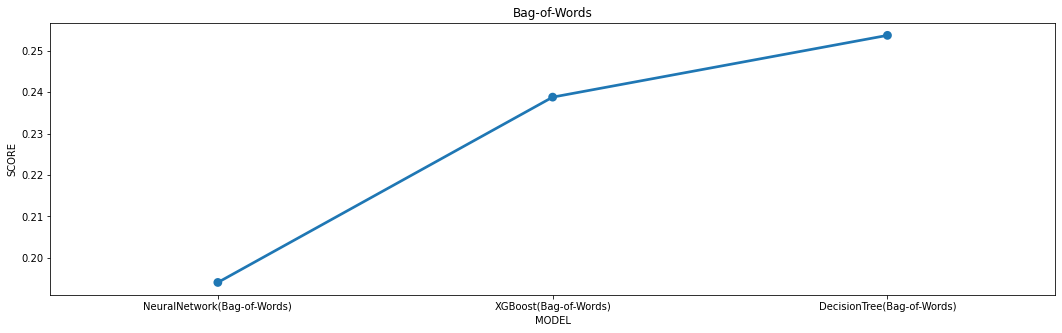

In [0]:
# Bag-of-Words
import seaborn as sns
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

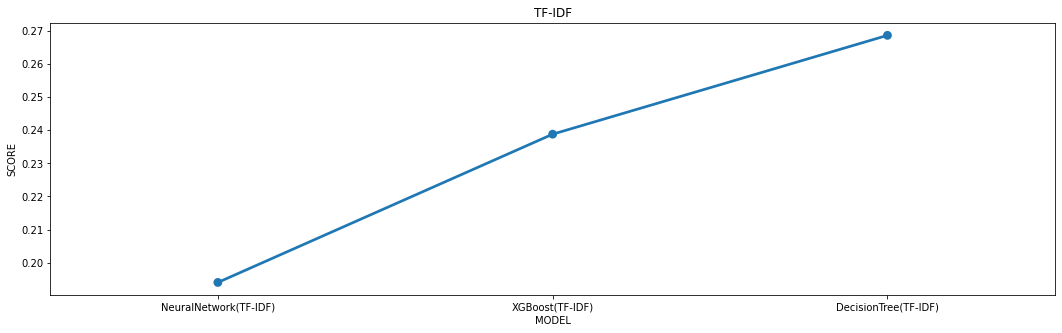

In [0]:
# TF-IDF
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

Playing around with auto-sklearn

In [0]:
!apt-get install swig -y
!pip install Cython numpy

# sometimes you have to run the next command twice on colab
# I haven't figured out why
!pip install auto-sklearn
# ignore some annoying warnings for demonstrating auto-sklearn 
# shouldn't be done in real production
import numpy as np
np.warnings.filterwarnings('ignore')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [0]:
#bag-of-words
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = sklearn.model_selection.train_test_split(df_bow,df['sentiments'],test_size=0.3,random_state=0)

In [0]:
#tfidf
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = sklearn.model_selection.train_test_split(df_tfidf,df['sentiments'],test_size=0.3,random_state=0)

In [0]:
import autosklearn.classification

# configure auto-sklearn
automl = autosklearn.classification.AutoSklearnClassifier(
          time_left_for_this_task=120, # run auto-sklearn for at most 2min
          per_run_time_limit=30, # spend at most 30 sec for each model training
          )

# train model(s)
automl.fit(x_train_tfidf, y_train_tfidf)

# evaluate
y_hat = automl.predict(x_valid_tfidf)
test_acc = sklearn.metrics.accuracy_score(y_valid_tfidf, y_hat)
print("Accuracy score {0}".format(test_acc))
print("", sklearn.metrics.confusion_matrix(y_valid_tfidf, y_hat))
print("", sklearn.metrics.classification_report(y_valid_tfidf, y_hat))

[WARNING] [2020-04-22 16:25:10,556:EnsembleBuilder(1):7cd6bcafa46e5bf85cfd8ff3cd84a18a] No models better than random - using Dummy Score!
[WARNING] [2020-04-22 16:25:10,570:EnsembleBuilder(1):7cd6bcafa46e5bf85cfd8ff3cd84a18a] No models better than random - using Dummy Score!
Accuracy score 0.6417910447761194
 [[ 0  7  3]
 [ 1 12  7]
 [ 0  6 31]]
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.48      0.60      0.53        20
           2       0.76      0.84      0.79        37

    accuracy                           0.64        67
   macro avg       0.41      0.48      0.44        67
weighted avg       0.56      0.64      0.60        67

